In [1]:
using Revise, RangeEnclosures, Plots

In [2]:
# Moore's function
f(x) = 1 + x^5 - x^4
dom = 0..1

[0, 1]

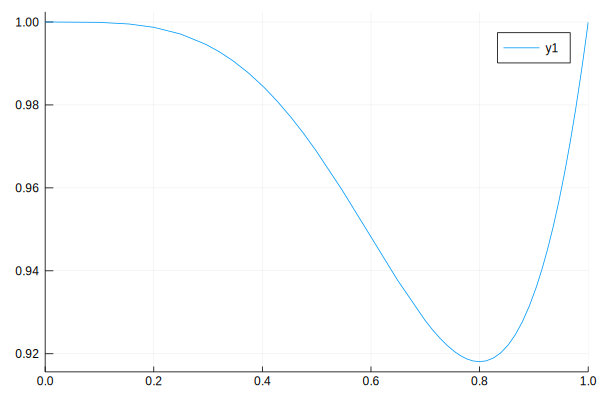

In [3]:
plot(f, xlims=(0, 1))

In [4]:
enclose(f, dom, :IntervalArithmetic)

[0, 2]

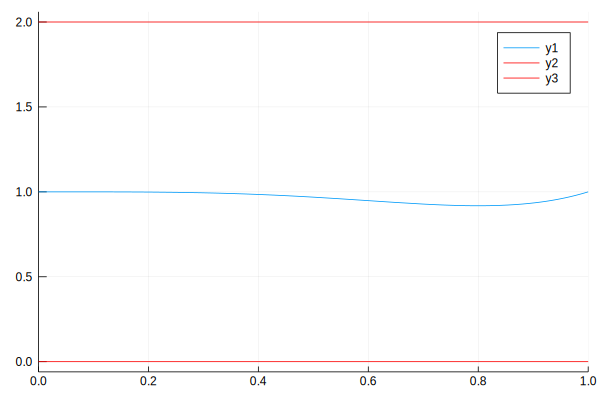

In [5]:
plot!(x -> 0, color=:red)
plot!(x -> 2, color=:red)

In [6]:
using RangeEnclosures: enclose_binary

In [7]:
y = enclose_binary(f, dom, kmax=20)

[0.916071, 1.00108]

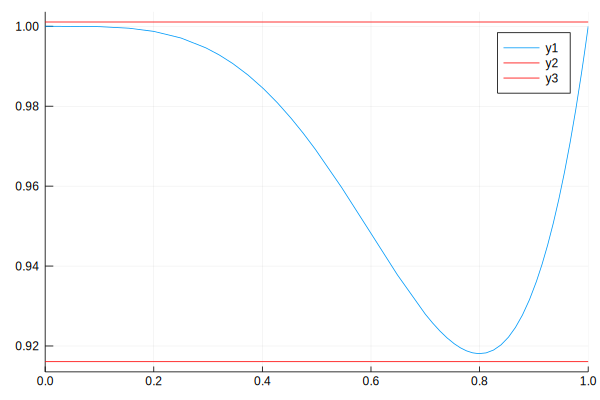

In [8]:
plot(f, xlims=(0, 1))
plot!(x -> inf(y), color=:red)
plot!(x -> sup(y), color=:red)

In [9]:
using BenchmarkTools

In [10]:
@btime enclose($f, $dom, :IntervalArithmetic)

  2.217 μs (64 allocations: 3.19 KiB)


[0, 2]

In [11]:
[@btime enclose_binary($f, $dom, kmax=$i) for i in [3, 5, 10, 20]]

  107.947 μs (2251 allocations: 97.44 KiB)
  425.987 μs (8555 allocations: 364.06 KiB)
  8.550 ms (166429 allocations: 6.86 MiB)
  21.008 ms (341483 allocations: 14.07 MiB)


4-element Array{Interval{Float64},1}:
 [0.504313, 1.4217] 
 [0.836203, 1.12377]
 [0.915994, 1.00422]
 [0.916071, 1.00108]

In [12]:
using RangeEnclosures: relative_precision

In [13]:
relative_precision(0..2, 0.504313 .. 1.4217)

[54.9727, 63.0378]

In [14]:
@btime enclose($f, $dom, :TaylorModels)

  126.145 μs (1978 allocations: 139.66 KiB)


[0.8125, 1.09375]

In [15]:
enclose_binary(f, dom, kmax=5, tol=1e-10, algorithm=:TaylorModels)

[0.893711, 1.01214]

In [16]:
enclose_binary(f, dom, kmax=200, tol=1e-10, algorithm=:IntervalArithmetic)

[0.916071, 1.00108]

In [17]:
enclose_binary(f, dom, kmax=200, tol=1e-10, algorithm=:IntervalArithmetic)

[0.916071, 1.00108]

In [18]:
enclose_binary(f, dom, kmax=200, tol=1e-10, algorithm=:SumOfSquares)

UndefVarError: UndefVarError: SDPA not defined

In [19]:
enclose(f, dom, :SumOfSquares)

UndefVarError: UndefVarError: SDPA not defined

In [20]:
f(x) = (x - 0.0)*(x - 0.1)*(x - 1.0)

f (generic function with 1 method)

In [21]:
enclose

enclose (generic function with 3 methods)